In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_df = pd.read_csv(clinical_trial_data_to_load)
clinical_trial_data_df.head()
# Combine the data into a single dataset

combined = pd.merge(clinical_trial_data_df,mouse_drug_data_df, how='left', on='Mouse ID')
# Display the data table for preview
combined.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
combined_data = combined.loc[:,['Timepoint', 'Tumor Volume (mm3)','Drug']]
grpd_combined_data = combined_data.groupby(['Drug', 'Timepoint'])

Tumor_Volume_mean = grpd_combined_data["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
grpd_combined_data_df = pd.DataFrame({"Tumor Volume (mm3)": Tumor_Volume_mean})
# Preview DataFrame
grpd_combined_data_df = grpd_combined_data_df.reset_index()
grpd_combined_data_df.head(10)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
combined_data_wserror = combined.loc[:,['Timepoint', 'Tumor Volume (mm3)','Drug']]
grpd_combined_data_wserror = combined_data.groupby(['Drug', 'Timepoint'])

Tumor_Volume_serror = grpd_combined_data_wserror["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
grpd_combined_data_df_wserror = pd.DataFrame({"Tumor Volume (mm3)": Tumor_Volume_serror})
grpd_combined_data_df_wserror = grpd_combined_data_df_wserror.reset_index()
# Preview DataFrame
grpd_combined_data_df_wserror.head(10)
#Tumor_Volume_serror

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [24]:
# Minor Data Munging to Re-Format the Data Frames
grpd_combined_data_df_wspivot = grpd_combined_data_df.pivot(index='Timepoint',
                                                                     columns='Drug')["Tumor Volume (mm3)"] 
# Preview that Reformatting worked

grpd_combined_data_df_wspivoterror = grpd_combined_data_df_wserror.pivot(index='Timepoint',
                                                                     columns='Drug')["Tumor Volume (mm3)"] 
grpd_combined_data_df_wspivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


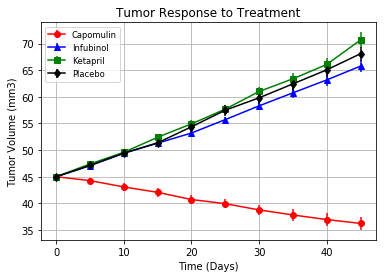

In [111]:
# Generate the Plot (with Error Bars)
Days = grpd_combined_data_df_wspivot.index
volume_Capomulin = grpd_combined_data_df_wspivot['Capomulin']
error_Capomulin = grpd_combined_data_df_wspivoterror['Capomulin']
plt.errorbar(Days, volume_Capomulin, yerr=error_Capomulin, fmt='r', marker = 'o', ls ="--")

volume_Infubinol = grpd_combined_data_df_wspivot['Infubinol']
error_Infubinol = grpd_combined_data_df_wspivoterror['Infubinol']
plt.errorbar(Days, volume_Infubinol, yerr=error_Infubinol,fmt = 'b', marker = '^', ls ="--")

volume_Ketapril = grpd_combined_data_df_wspivot['Ketapril']
error_Ketapril = grpd_combined_data_df_wspivoterror['Ketapril']
plt.errorbar(Days, volume_Ketapril, yerr=error_Ketapril, fmt = 'g', marker = "s", ls ="--")

volume_Placebo = grpd_combined_data_df_wspivot['Placebo']
error_Placebo = grpd_combined_data_df_wspivoterror['Placebo']
plt.errorbar(Days, volume_Placebo, yerr=error_Placebo, fmt='k', marker = 'd', ls ="--")

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.legend(loc="best", fontsize = "small", fancybox=True)
plt.grid(True)


# Save the Figure
plt.savefig("../Images/avg_state_rain.png")


In [6]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
combined_data2 = combined.loc[:,['Timepoint', 'Metastatic Sites','Drug']]
grpd_combined_data2 = combined_data2.groupby(['Drug', 'Timepoint'])

Metastatic_mean = grpd_combined_data2['Metastatic Sites'].mean()

# Convert to DataFrame
grpd_combined_data_df2 = pd.DataFrame({"Metastatic Sites": Metastatic_mean})
grpd_combined_data_df2 = grpd_combined_data_df2.reset_index()
# Preview DataFrame

grpd_combined_data_df2.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [21]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
combined_data_wserror2 = combined.loc[:,['Timepoint', 'Metastatic Sites','Drug']]
grpd_combined_data_wserror2 = combined_data_wserror2.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']
grpd_combined_data_df_wserror2 = pd.DataFrame(grpd_combined_data_wserror2)
#Metastatic_error = grpd_combined_data_wserror2['Metastatic Sites'].sem()
#Convert to DataFrame
#grpd_combined_data_df_wserror2 = pd.DataFrame({"Metastatic Sites": Metastatic_error})
grpd_combined_data_df_wserror2 = grpd_combined_data_df_wserror2.reset_index()
#grpd_combined_data_wserror2
# Preview DataFrame
#grpd_combined_data_df_wserror2.head()

grpd_combined_data_df_wserror2.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [31]:
# Minor Data Munging to Re-Format the Data Frames
grpd_combined_data_df_wspivot2 = grpd_combined_data_df2.pivot(index='Timepoint',
                                                                     columns='Drug'
                                                                     )["Metastatic Sites"]
# Preview that Reformatting worked


#FOR WHATEVER REASON I GET THE WRONG RESULTS HERE
grpd_combined_data_df_wspivot2wserror2 = grpd_combined_data_df_wserror2.pivot(index='Timepoint',
                                                                     columns='Drug' 
                                                                    )["Metastatic Sites"]
grpd_combined_data_df_wspivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


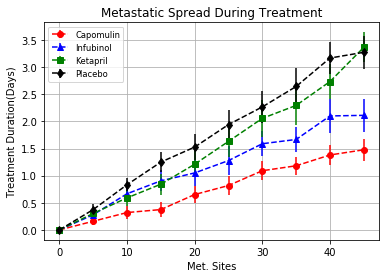

In [117]:
# Generate the Plot (with Error Bars)
Days = grpd_combined_data_df_wspivot2.index
volume_Capomulin2 = grpd_combined_data_df_wspivot2['Capomulin']
error_Capomulin2 = grpd_combined_data_df_wspivot2wserror2['Capomulin']
plt.errorbar(Days, volume_Capomulin2, yerr=error_Capomulin2, fmt='r', marker = 'o', ls ="--")
volume_Infubinol2 = grpd_combined_data_df_wspivot2['Infubinol']
error_Infubinol2 = grpd_combined_data_df_wspivot2wserror2['Infubinol']
plt.errorbar(Days, volume_Infubinol2, yerr=error_Infubinol2,fmt = 'b', marker = '^', ls ="--")
volume_Ketapril2 = grpd_combined_data_df_wspivot2['Ketapril']
error_Ketapril2 = grpd_combined_data_df_wspivot2wserror2['Ketapril']
plt.errorbar(Days, volume_Ketapril2, yerr=error_Ketapril2, fmt = 'g', marker = "s", ls ="--")
volume_Placebo2 = grpd_combined_data_df_wspivot2['Placebo']
error_Placebo2 = grpd_combined_data_df_wspivot2wserror2['Placebo']
plt.errorbar(Days, volume_Placebo2, yerr=error_Placebo2, fmt='k', marker = 'd', ls ="--")

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Met. Sites")
plt.ylabel("Treatment Duration(Days)")
plt.grid(True)
plt.legend(loc="best", fontsize = "small", fancybox=True)

plt.show()
# Save the Figure
# Save the Figure

# Show the Figure


## Survival Rates

In [27]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
combined_data_mouse = combined.loc[:,['Timepoint', 'Mouse ID','Drug']]
grpd_combined_data_mouse = combined_data_mouse.groupby(['Drug', 'Timepoint'])
# Convert to DataFrame
Mouse_count = grpd_combined_data_mouse["Mouse ID"].count()

grpd_combined_data_df_mouse = pd.DataFrame({"Mouse ID": Mouse_count})

grpd_combined_data_df_mouse = grpd_combined_data_df_mouse.reset_index()
# Preview DataFrame
grpd_combined_data_df_mouse.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [32]:
# Minor Data Munging to Re-Format the Data Frames
pivoted_grpd_combined_data_df_mouse = grpd_combined_data_df_mouse.pivot(index = "Timepoint",
                                 columns = "Drug")["Mouse ID"]
# Preview the Data Frame
pivoted_grpd_combined_data_df_mouse

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


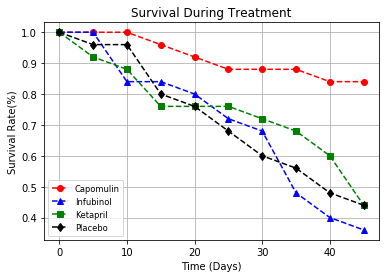

In [118]:
# Generate the Plot (Accounting for percentages)
Days = pivoted_grpd_combined_data_df_mouse.index

volume_Capomulin3 = (pivoted_grpd_combined_data_df_mouse['Capomulin'])/(pivoted_grpd_combined_data_df_mouse['Capomulin'][0])
plt.errorbar(Days, volume_Capomulin3, fmt='r', marker = 'o', ls ="--")

volume_Infubinol3 = (pivoted_grpd_combined_data_df_mouse['Infubinol'])/(pivoted_grpd_combined_data_df_mouse['Infubinol'][0])
plt.errorbar(Days, volume_Infubinol3,fmt = 'b', marker = '^', ls ="--")

volume_Ketapril3 = (pivoted_grpd_combined_data_df_mouse['Ketapril'])/(pivoted_grpd_combined_data_df_mouse['Ketapril'][0])
plt.errorbar(Days, volume_Ketapril3, fmt = 'g', marker = "s", ls ="--")

volume_Placebo3 = (pivoted_grpd_combined_data_df_mouse['Placebo'])/(pivoted_grpd_combined_data_df_mouse['Placebo'][0])
plt.errorbar(Days, volume_Placebo3, fmt='k', marker = 'd', ls ="--")

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate(%)")
plt.grid(True)
plt.legend(loc="best", fontsize = "small", fancybox=True)

plt.show()
# Save the Figure

# Show the Figure
#plt.show()

## Summary Bar Graph

In [79]:
# Calculate the percent changes for each drug
#we can grab our pivoted data frame, and then for each drug we need to do a function of [-1]-[0]*100, and store that into value
#t= (((grpd_combined_data_df_wspivot["Capomulin"][45])-(grpd_combined_data_df_wspivot["Capomulin"][0]))/(grpd_combined_data_df_wspivot["Capomulin"][0]))
#j=t*100

# Display the data to confirm
percentage_change= (((((grpd_combined_data_df_wspivot.iloc[-1,:])-(grpd_combined_data_df_wspivot.loc[0,:]))/(grpd_combined_data_df_wspivot.loc[0,:])))*100)
#i = (grpd_combined_data_df_wspivot["Drug"][45]-grpd_combined_data_df_wspivot["Drug"][0])/grpd_combined_data_df_wspivot["Drug"][0]
#i
percentage_change
#i = (grpd_combined_data_df_wspivot[45]-grpd_combined_data_df_wspivot[0])/grpd_combined_data_df_wspivot[0]
#i

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [80]:

CapomulinPerc = percentage_change["Capomulin"]
CapomulinPerc

InfubinolPerc = percentage_change["Infubinol"]
InfubinolPerc

KetaprilPerc = percentage_change["Ketapril"]
KetaprilPerc

PlaceboPerc = percentage_change["Placebo"]
PlaceboPerc

51.29796048315153

NameError: name 'fig' is not defined

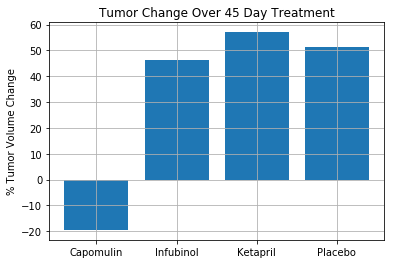

In [126]:
# Store all Relevant Percent Changes into a Tuple
#Tuple = {"Capomulin":CapomulinPerc,
        #"Infubinol":InfubinolPerc,
        #"Ketapril":KetaprilPerc,
        #"Placebo":PlaceboPerc}
Drugs= ["Capomulin","Infubinol","Ketapril","Placebo"]
DrugPercentages = [CapomulinPerc,InfubinolPerc,KetaprilPerc,PlaceboPerc]

x_axis = np.arange(len(DrugPercentages))

plt.bar(x_axis, DrugPercentages, align="center")
# Splice the data between passing and failing drugs

#DrugPercentages['positive'] = DrugPercentages[i] > 0
#DrugPercentages.plot(kind='barh', color=DrugPercentages.positive.map({True: 'r', False: 'g'}))

# Orient widths. Add labels, tick marks, etc. (kind of did)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,Drugs)

plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.grid(True)
# Use functions to label the percentages of changes
#DID NOT COMPLETE, CURIOUS HOW TO DO THIS
# Call functions to implement the function calls
#DID NOT COMPLETE, CURIOUS HOW TO DO THIS

# Save the Figure


# Show the Figure
fig.show()